In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
#depositar o dataframe na variável base_census
base_census = pd.read_csv('Base_de_dados\census.csv')

#exibir estatísicas com os valores numéricos
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [90]:
#verificar se há valores nulos, sum() para somar o números de nulos
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [91]:
np.unique(base_census['income'], return_counts = True)
#contagem de quantos registros há no Income


(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

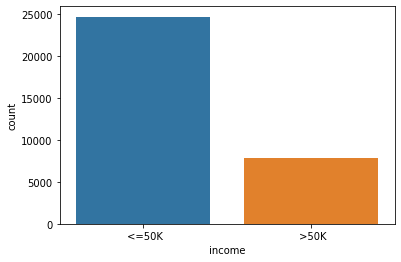

In [92]:
#visualização dos dados de income
sns.countplot( x = base_census['income']);
#quantidade desbalançeada dos dados

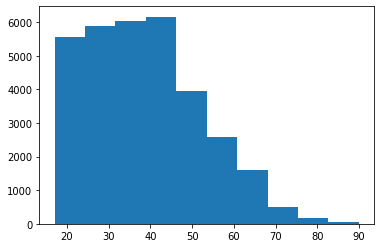

In [93]:
#histograma das idades, para melhor visualização
plt.hist(base_census['age']);

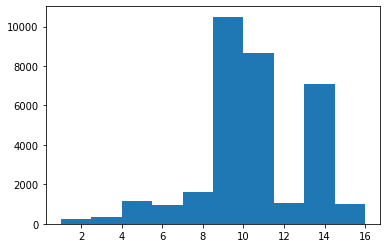

In [94]:
plt.hist( x = base_census['education-num']);

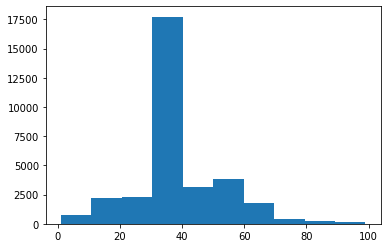

In [95]:
plt.hist(base_census['hour-per-week']);

In [96]:
#geração de gráficos dinâmicos 
grafico = px.treemap(base_census, path= ['occupation','relationship','age'])
grafico.show()

In [97]:
grafico = px.parallel_categories(base_census,dimensions=['education','income'])
grafico.show()

In [98]:
#nome das colunas de base census
base_census.columns


Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [67]:
#Divisão entre previsores e classe
'''Criando uma variável para cada uma, X -> previsores, Y -> classe'''

x_census = base_census.iloc[:, 0:14].values
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [68]:
y_census = base_census.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

Tratamento de atributos categóricos

1- LabelEncoder
2- OneHotEncoder

In [69]:
'''LabelEncoder'''
from sklearn.preprocessing import LabelEncoder

In [70]:
label_encoder_teste = LabelEncoder()
label_encoder_teste

LabelEncoder()

In [71]:
teste = label_encoder_teste.fit_transform(x_census[:,1]) #transformando atributos string como números 
teste

array([7, 6, 4, ..., 4, 4, 5])

In [72]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [73]:
#Divisão entre previsores e classe
'''Criando uma variável para cada uma, X -> previsores, Y -> classe'''

x_census = base_census.iloc[:, 0:14].values
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [74]:
'''Transformando todos os atributos string em valores numéricos'''
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [75]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [76]:
'''OneHotEncoder'''
#resolver problemas de prioridade com os valores altos obtidos com o encoder:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [77]:
onehotencoder_census = ColumnTransformer(transformers = [('OneHot',OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder = 'passthrough')
#remainder = 'passthrough' para não excluir aqueles que não são strings

In [78]:
x_census = (onehotencoder_census.fit_transform(x_census)).toarray()

In [ ]:
x_census

In [ ]:
x_census[0]

In [82]:
x_census.shape

(32561, 108)

Escalonamento de valores

In [84]:
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [87]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

Divisão das bases em treinamento e teste


In [88]:
from sklearn.model_selection import train_test_split

Credit data

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x)